# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

import re
from datetime import datetime, timedelta 

In [2]:
# if you use Google Colab:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# change this line your folder where the data is found
basedir = 'C:/Users/user/Assignment-Comput/CW2'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [4]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
    return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [5]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [6]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    df.drop(columns=['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped',
                     'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about', 
                     'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 
                     'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights',
                     'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                     'number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                     'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],inplace=True)
    return df

In [7]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [8]:
len(df.columns)

45

In [9]:
colums_list = df.columns
    
l = [i for i in colums_list if(df[i].isnull().sum() / len(df[i])) >= 0.5]
l

['host_response_time',
 'host_response_rate',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'license']

In [10]:
def drop_cols_na(df, threshold = 0.5):
    colums_list = df.columns
    
    l = [i for i in colums_list if(df[i].isnull().sum() / len(df[i])) >= threshold]
    df.drop(columns=l,inplace=True)
    return df

In [11]:
df = drop_cols_na(df)

In [12]:
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,t,Indische Buurt,1.0,t,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,f,Grachtengordel,2.0,t,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,t,Grachtengordel,2.0,t,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,t,Westelijke Eilanden,1.0,t,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,t,Amsterdam Centrum,2.0,t,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,f,NaN,0.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,f,NaN,2.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,f,NaN,2.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,f,NaN,1.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [13]:
q = list(df['host_has_profile_pic'].unique())
q.remove(np.nan)
q.sort()
q

['f', 't']

## Question 1b

In [14]:
def binary_encoding(df):
    colums_list = df.columns
    
    binary_columns = []
    for i in colums_list:
        q = list(df[i].unique())
        try:
            q.remove(np.nan)
        except:
            pass
        q.sort()
        if q == ['f','t']:
            binary_columns.append(i)
    
    
    for i in binary_columns:
        df[i] = df[i].replace(['f','t'], [0, 1])
        
    return df

In [15]:
df = binary_encoding(df)

In [16]:
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [17]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [18]:
column_list = df.columns
for i in column_list:
    print(df[i].head(5))

0     2818
1    20168
2    25428
3    27886
4    28871
Name: id, dtype: int64
0             Quiet Garden View Room & Super Fast WiFi
1         Studio with private bathroom in the centre 1
2      Lovely apt in City Centre (w.lift) near Jordaan
3    Romantic, stylish B&B houseboat in canal district
4                              Comfortable double room
Name: name, dtype: object
0      3159
1     59484
2     56142
3     97647
4    124245
Name: host_id, dtype: int64
0       Daniel
1    Alexander
2         Joan
3         Flip
4        Edwin
Name: host_name, dtype: object
0    2008-09-24
1    2009-12-02
2    2009-11-20
3    2010-03-23
4    2010-05-13
Name: host_since, dtype: object
0    100%
1    100%
2     57%
3    100%
4     92%
Name: host_acceptance_rate, dtype: object
0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: host_is_superhost, dtype: float64
0         Indische Buurt
1         Grachtengordel
2         Grachtengordel
3    Westelijke Eilanden
4      Amsterdam Centrum
Name: host_ne

In [19]:
pd.to_datetime(df['host_since'], format="%Y-%m-%d")

0       2008-09-24
1       2009-12-02
2       2009-11-20
3       2010-03-23
4       2010-05-13
           ...    
18517   2020-12-10
18518   2019-07-25
18519   2020-11-12
18520   2020-12-11
18521   2018-09-03
Name: host_since, Length: 18522, dtype: datetime64[ns]

In [20]:
# hint: check Pandas to_datetime method
def add_host_days(df):
    time2 = datetime.now()
    df['host_since'] =  pd.to_datetime(df['host_since'], format="%Y-%m-%d")
    df['host_days'] = df['host_since'].apply(lambda x : (time2 - x).days)
    return df

In [21]:
def convert_price(df):
    df['price'] = df['price'].apply(lambda x : round(float(x.replace("$","").replace(",","")),1))
    return df

In [22]:
df = add_host_days(df)
df = convert_price(df)

In [23]:
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4618.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4184.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4196.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4073.0
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,158.0
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,662.0
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,186.0
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,157.0


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [24]:
# How many hosts offer 2 or more properties for rent?
(df['host_listings_count'] >= 2).sum()

4172

In [25]:
# What is the highest price for a listing?
df['price'].max()

8000.0

In [26]:
# What is the ID of the listing that has the largest number of bedrooms?
df[df['bedrooms'] == df['bedrooms'].max()]['id']

18352    46015289
Name: id, dtype: int64

In [27]:
# What is the ID of the listing with the largest advertised price
df[df['price'] == df['price'].max()]['id']

88         258273
10972    21946106
Name: id, dtype: int64

In [28]:
# There are different room types. How many listings are there for the most common room type?
df['room_type'].value_counts()  # answer : Entire home/apt 

Entire home/apt    14433
Private room        3896
Hotel room           141
Shared room           52
Name: room_type, dtype: int64

In [30]:
# How many hosts are there that have been registered for more than 3000 days?
len(df[df['host_days'] > 3000]['host_id'].unique())

2296

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

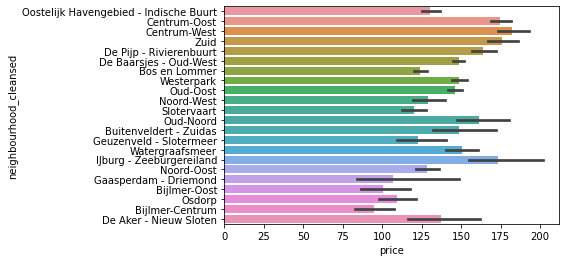

In [31]:
# your code...
sns.barplot(x="price", y="neighbourhood_cleansed", data=df)

Plot a correlation matrix as instructed in the Coursework proforma:

In [32]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'],
      dtype='object')

In [33]:
# your code...
pearsoncorr = df[['review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location',
                  'review_scores_value']].corr(method='pearson')
pearsoncorr

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_cleanliness,1.000000,0.419123,0.443067,0.255506,0.544723
review_scores_checkin,0.419123,1.000000,0.649131,0.303247,0.454755
review_scores_communication,0.443067,0.649131,1.000000,0.308835,0.502211
review_scores_location,0.255506,0.303247,0.308835,1.000000,0.376400
review_scores_value,0.544723,0.454755,0.502211,0.376400,1.000000


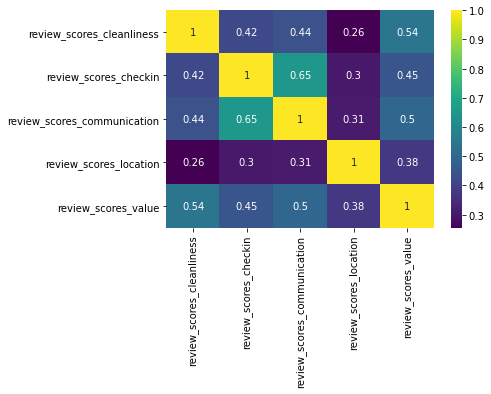

In [34]:
#https://www.programmersought.com/article/15935826687/
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='viridis',
            annot=True,
            linewidth=0)

Plot a geographical distribution as instructed in the Coursework proforma:

In [35]:
# your code...
df150 = df[df['price'] > 150]
df150

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4184.0
6,31080,2-story apartment + rooftop terrace,133488,Nienke,2010-05-27,0%,0.0,Hoofddorppleinbuurt,1.0,1.0,...,95.0,9.0,10.0,10.0,10.0,9.0,9.0,0,0.28,4008.0
7,41125,Amsterdam Center Entire Apartment,178515,Fatih,2010-07-23,70%,1.0,Jordaan,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.73,3951.0
8,43109,Oasis in the middle of Amsterdam,188098,Aukje,2010-08-01,0%,0.0,Grachtengordel,0.0,1.0,...,98.0,10.0,7.0,9.0,10.0,10.0,9.0,0,4.31,3942.0
13,49790,Luxurous Houseboat-Great Location,227530,Klaas,2010-09-07,33%,0.0,Oud-West,0.0,1.0,...,99.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0.88,3905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18482,46723024,2BDR Guest Suite @ City Centre,159220160,Lydia,2017-11-18,99%,0.0,Jordaan,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1276.0
18496,46817578,Suite aan de gracht,347420264,Sico,2020-05-24,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,358.0
18516,46937483,♛♝♕ WOW 3 BD APT - Oosterpark Amsterdam ♛♝♕,379277730,Jean,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,158.0
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,158.0


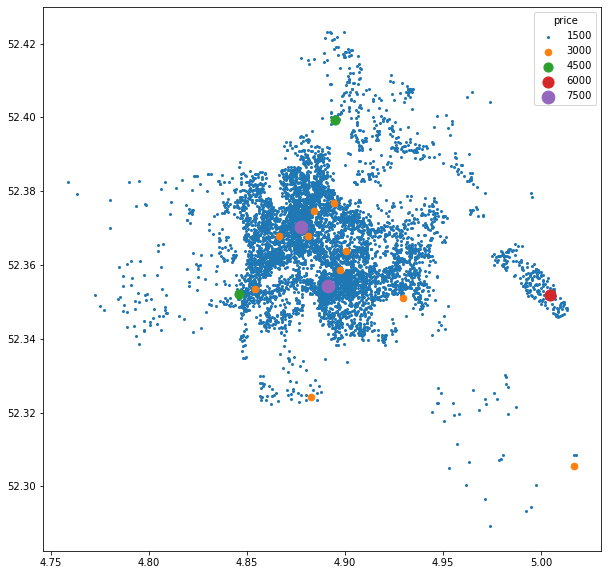

In [36]:
M = 6
x = df150['longitude']
y = df150['latitude']
a2 = df150['price']
 
# Create the DataFrame from randomised data and bin it using groupby.
df_new = pd.DataFrame(data=dict(x=x, y=y, a2=a2))
bins = np.linspace(df_new.a2.min(), df_new.a2.max(), M)
grouped = df_new.groupby(np.digitize(df_new.a2, bins))
 
# Create some sizes and some labels.
sizes = [40*(i+0.1) for i in range(M)]
labels = ['1500', '3000', '4500', '6000', '7500']

plt.figure(figsize=(10, 10))
for i, (name, group) in enumerate(grouped):
    plt.scatter(group.x, group.y, s=sizes[i], alpha=1, label=labels[i], cmap="Spectral")

plt.legend(loc="upper right", title="price")
plt.show()

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests

In [37]:
# your linear regression code...
X = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
      'review_scores_location','review_scores_value']].fillna(0)
Y = df['review_scores_rating'].fillna(0)
model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.998
Model:                              OLS   Adj. R-squared (uncentered):              0.998
Method:                   Least Squares   F-statistic:                          1.668e+06
Date:                  Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                          14:33:23   Log-Likelihood:                         -50998.
No. Observations:                 18522   AIC:                                  1.020e+05
Df Residuals:                     18516   BIC:                                  1.021e+05
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
review_scores_accuracy          2.8722      0.056     51.636      0.000       2.763       2.981
review_scores_cleanliness       2.3234      0.042     55.915      0.000       2.242       2.405
review_scores_checkin           0.4413      0.058      7.613      0.000       0.328       0.555
review_scores_communication     2.1849      0.062     35.333      0.000       2.064       2.306
review_scores_location          0.3225      0.043      7.574      0.000       0.239       0.406
review_scores_value             1.7979      0.047     37.893      0.000       1.705       1.891
==============================================================================
Omnibus:                    15475.988   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5304338.607
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      85.677   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences):There are signinificant difference in nightly price of room types between PR/EHA, PR/HR, EHA/HR, EHA/SH and HR/SH. (PR,EHA,HR and SH denoted Private Room, Entire home/apt, Hotel Room and Shared room accordingly)

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): There is change in result after performing Bonferroni. There are no significnat difference in HR/SH in Bonferroni correction 


In [38]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [39]:
# your t-test code...
PR = df[df['room_type'] == 'Private room']['price']
EHA = df[df['room_type'] == 'Entire home/apt']['price']
HR = df[df['room_type'] == 'Hotel room']['price']
SH = df[df['room_type'] == 'Shared room']['price']

In [48]:
from scipy import stats
def t_test(data1,data2):
    
    print('null hypothesis : no difference \n')
    lresult = stats.levene(data1,data2)
    #print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))
       
        
    if lresult.pvalue > 0.05:
        result = stats.ttest_ind(data1,data2,equal_var=True)
    else:
        result = stats.ttest_ind(data1,data2,equal_var=False)
    print('t statistic : %.3f \np-value : %.3f' % (result))
    
    
    if result.pvalue < 0.05:
        print("\nstatistically significant result is one where the observed p-value is less than (or equal to) 5%, \nReject the null hypothesis")
    else:
        print(" statistically significant result is one where the observed p-value is more than 5%,\n Fail to reject the null hypothesis.")
        
    plt.boxplot([data1,data2])
    plt.show()

null hypothesis : no difference 

t statistic : -35.863 
p-value : 0.000

statistically significant result is one where the observed p-value is less than (or equal to) 5%, 
Reject the null hypothesis


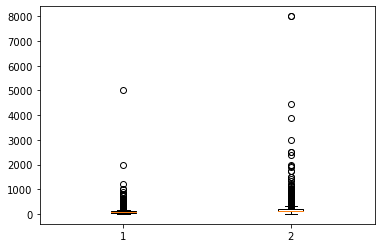

In [49]:
t_test(PR, EHA)  

null hypothesis : no difference 

t statistic : -2.541 
p-value : 0.012

statistically significant result is one where the observed p-value is less than (or equal to) 5%, 
Reject the null hypothesis


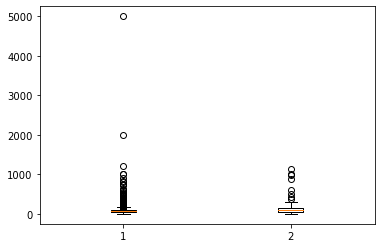

In [50]:
t_test(PR, HR) 

null hypothesis : no difference 

t statistic : -0.753 
p-value : 0.452
 statistically significant result is one where the observed p-value is more than 5%,
 Fail to reject the null hypothesis.


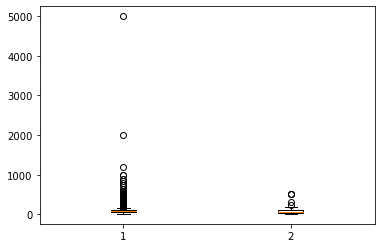

In [51]:
t_test(PR, SH) 

null hypothesis : no difference 

t statistic : 2.607 
p-value : 0.010
 statistically significant result is one where the observed p-value is more than 5%,
 Fail to reject the null hypothesis.


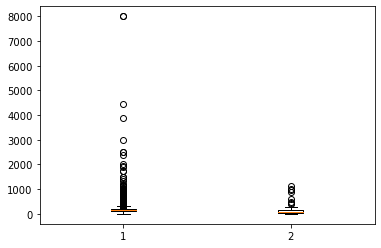

In [44]:
t_test(EHA, HR)

null hypothesis : no difference 

t statistic : 3.066 
p-value : 0.002

statistically significant result is one where the observed p-value is less than (or equal to) 5%, 
Reject the null hypothesis


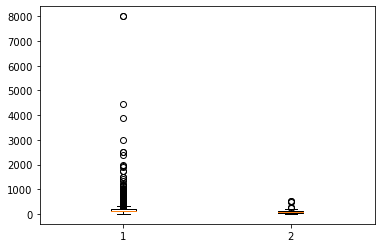

In [52]:
t_test(EHA, SH) 

null hypothesis : no difference 

t statistic : 1.013 
p-value : 0.312
 statistically significant result is one where the observed p-value is more than 5%,
 Fail to reject the null hypothesis.


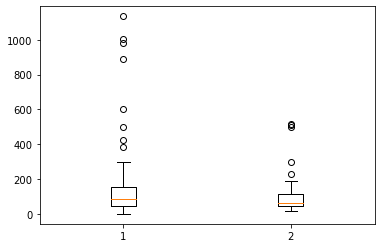

In [53]:
t_test(HR, SH)

In [47]:
#https://mindscale.kr/course/basic-stat-python/22/
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df['price'], df['room_type'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
Entire home/apt,Hotel room,2.9756,0.0029,0.0176,True
Entire home/apt,Private room,29.2754,0.0,0.0,True
Entire home/apt,Shared room,3.0655,0.0022,0.0131,True
Hotel room,Private room,4.0184,0.0001,0.0004,True
Hotel room,Shared room,1.0135,0.3121,1.0,False
Private room,Shared room,-0.7527,0.4517,1.0,False


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...
The value of R squared is the explantory power. By maximising this explanatory power, we could exclude insignificant variables and model with maximum explanatory power can be derived with significant variables. 

In [54]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'],
      dtype='object')

In [55]:
pd.get_dummies(df['property_type'])

,Barn,Boat,Bus,Camper/RV,Campsite,Cave,Earth house,Entire apartment,Entire bed and breakfast,Entire bungalow,...,Shared room in boat,Shared room in boutique hotel,Shared room in camper/rv,Shared room in hostel,Shared room in house,Shared room in houseboat,Shared room in loft,Tiny house,Tipi,Yurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18519,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df['price'] 
selected_variables = ['property_type','room_type', 'accommodates', 'bedrooms',
                      'beds','minimum_nights', 'maximum_nights', 'availability_30',
                      'availability_60', 'availability_90'] 

X = df[selected_variables]

In [58]:
i = 'room_type'
d = pd.get_dummies(df[i])
X = pd.concat([X,d],axis=1)
#X.drop(columns = [i],inplace = True)
l = list(d.columns)
l

['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [59]:
X[['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']]

,Entire home/apt,Hotel room,Private room,Shared room
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
18517,1,0,0,0
18518,1,0,0,0
18519,1,0,0,0
18520,0,0,1,0


In [60]:
sm.OLS(y,X[l]).fit()

In [61]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'],
      dtype='object')

In [62]:
selected_variables

['property_type',
 'room_type',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90']

In [63]:
df_step_pre = df[selected_variables]
df_step_pre

,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90
0,Private room in apartment,Private room,2,1.0,2.0,3,1125,12,42,62
1,Private room in townhouse,Private room,2,1.0,1.0,1,365,3,3,3
2,Entire apartment,Entire home/apt,3,1.0,1.0,14,180,7,7,7
3,Private room in houseboat,Private room,2,1.0,1.0,2,730,26,56,84
4,Private room in apartment,Private room,2,1.0,1.0,2,1825,28,58,88
...,...,...,...,...,...,...,...,...,...,...
18517,Entire apartment,Entire home/apt,6,2.0,4.0,3,1125,27,57,87
18518,Entire apartment,Entire home/apt,8,3.0,5.0,4,23,21,21,21
18519,Entire apartment,Entire home/apt,4,2.0,2.0,28,1125,11,41,71
18520,Private room in apartment,Private room,3,1.0,1.0,2,1125,29,59,89


In [64]:
d = pd.get_dummies(df[["property_type","room_type"]])   
d


,property_type_Barn,property_type_Boat,property_type_Bus,property_type_Camper/RV,property_type_Campsite,property_type_Cave,property_type_Earth house,property_type_Entire apartment,property_type_Entire bed and breakfast,property_type_Entire bungalow,...,property_type_Shared room in house,property_type_Shared room in houseboat,property_type_Shared room in loft,property_type_Tiny house,property_type_Tipi,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18518,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18519,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
df_step_data = pd.concat([df_step_pre.drop(columns = {"property_type","room_type"}),d],axis = 1)
df_step_data

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,property_type_Barn,property_type_Boat,...,property_type_Shared room in house,property_type_Shared room in houseboat,property_type_Shared room in loft,property_type_Tiny house,property_type_Tipi,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,1.0,2.0,3,1125,12,42,62,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1.0,1,365,3,3,3,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1.0,1.0,14,180,7,7,7,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,1.0,1.0,2,730,26,56,84,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1.0,1.0,2,1825,28,58,88,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,6,2.0,4.0,3,1125,27,57,87,0,0,...,0,0,0,0,0,0,1,0,0,0
18518,8,3.0,5.0,4,23,21,21,21,0,0,...,0,0,0,0,0,0,1,0,0,0
18519,4,2.0,2.0,28,1125,11,41,71,0,0,...,0,0,0,0,0,0,1,0,0,0
18520,3,1.0,1.0,2,1125,29,59,89,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
y_train = y.values
y_train

array([ 59., 236., 125., ...,  60.,  67.,  96.])

In [67]:
# Stepwise

def stepwise_selection(X, y,  
                       initial_list=[], 
                       threshold_in=0.5, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    best_rsquared_b = 0
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_rsquared = pd.Series(index=excluded)
        for new_column in excluded:
            try:
                model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
                new_rsquared[new_column] = model.rsquared
            except:
                pass
        best_rsquared = new_rsquared.max()
        if best_rsquared > best_rsquared_b:
            best_rsquared_b = best_rsquared
            if best_rsquared > threshold_in:
                best_feature = new_rsquared.idxmax() 
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with rsquared {:.6}'.format(best_feature, best_rsquared))

            # backward step
            model = sm.OLS(y, pd.DataFrame(X[included])).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax() 
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with rsquared {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        else :
            break
    return included

result = stepwise_selection(df_step_data,y_train)

print('resulting features:')
print(result)

<ipython-input-67-266fac1d8990>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_rsquared = pd.Series(index=excluded)


Add  accommodates                   with rsquared 0.562752
Add  property_type_Lighthouse       with rsquared 0.583006
Add  room_type_Entire home/apt      with rsquared 0.598289
Add  availability_90                with rsquared 0.602498
Add  property_type_Entire loft      with rsquared 0.603703
Add  minimum_nights                 with rsquared 0.604561
Add  property_type_Room in serviced apartment with rsquared 0.604922
Add  property_type_Private room in serviced apartment with rsquared 0.605195
Add  property_type_Houseboat        with rsquared 0.605466
Add  property_type_Entire villa     with rsquared 0.60566
Add  property_type_Entire guest suite with rsquared 0.605844
Add  property_type_Boat             with rsquared 0.605982
Add  property_type_Room in boutique hotel with rsquared 0.606096
Add  property_type_Private room in apartment with rsquared 0.606195
Add  property_type_Entire townhouse with rsquared 0.606299
Add  availability_30                with rsquared 0.606379
Drop availab

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [61]:
budget_min = 50
budget_max = 100
data = df[(df['price'] >= budget_min) & (df['price'] < budget_max)]
list(data[data['host_listings_count'] == data['host_listings_count'].max()]['neighbourhood_cleansed'])

['Centrum-West']

In [62]:
relative_data = data[['neighbourhood_cleansed','host_listings_count']].groupby(['neighbourhood_cleansed']).agg({'host_listings_count':[max,sum]})
relative_data.columns = ['max','sum']
relative_data['relative'] = relative_data['max']/relative_data['sum']
list(relative_data[relative_data['relative'] == relative_data['relative'].max()].index)

['Bijlmer-Centrum']

In [63]:
# your code...
def recommend_neighbourhood(df, budget_min, budget_max, relative=False):
    data = df[(df['price'] >= budget_min) & (df['price'] <= budget_max)]
    
    if relative:
        relative_data = data[['neighbourhood_cleansed','host_listings_count']].groupby(['neighbourhood_cleansed']).agg({'host_listings_count':[max,sum]})
        relative_data.columns = ['max','sum']
        relative_data['relative'] = relative_data['max']/relative_data['sum']
        return list(relative_data[relative_data['relative'] == relative_data['relative'].max()].index)
    else:
        return list(data[data['host_listings_count'] == data['host_listings_count'].max()]['neighbourhood_cleansed'])
    


In [64]:
recommend_neighbourhood(df, 100, 50000, relative=False)

['Bos en Lommer']

### Price recommender for hosts

In [65]:
latitude = 52.36573
longitude = 4.94141

In [66]:
def Euclidean_distance(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [67]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [68]:
df['latitude1'] = latitude
df['longitude1'] = longitude
n_neighbours = 100
room_type = 'Private room'

df['Euclidean_distance'] = np.sqrt((df['latitude']-df['latitude1'])**2 + (df['longitude']-df['longitude1'])**2)
df = df.sort_values(by = 'Euclidean_distance')
df_n = df.head(n_neighbours)

if room_type != None:
    df_n = df_n[df_n['room_type'] == room_type]
df_n['price'].mean()

78.13333333333334

In [69]:
# your code...
def recommend_price(df, latitude, longitude, n_neighbours, room_type = None):
    df['latitude1'] = latitude
    df['longitude1'] = longitude

    df['Euclidean_distance'] = np.sqrt((df['latitude']-df['latitude1'])**2 + (df['longitude']-df['longitude1'])**2)
    df = df.sort_values(by = 'Euclidean_distance')
    df_n = df.head(n_neighbours)

    if room_type != None:
        df_n = df_n[df_n['room_type'] == room_type]
    
    return df_n['price'].mean()



In [70]:
recommend_price(df,  52.36573,  4.94141, 100, room_type = 'Private room')

78.13333333333334